In [1]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image

In [2]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [3]:
def should_continue(state: MessagesState) -> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END



In [4]:
def call_model(state: MessagesState):
    messages  = state['messages']
    response = llm.invoke(messages)
    
    return {'messages': messages + [response]}

In [5]:
graph = StateGraph(MessagesState)

In [6]:
graph.add_node('agent', call_model)

In [7]:
search_tool = TavilySearchResults(max_results=5)

In [9]:
tools = [search_tool]

tool_node = ToolNode(tools)

graph.add_node('tools', tool_node)

In [10]:
# This means that the first node is the agent
# similar to setting graph.set_entry_point('agent')
graph.add_edge(START, "agent")

In [11]:
graph.add_conditional_edges('agent', should_continue)

In [12]:
graph.add_edge('tools', 'agent')

In [13]:
graph_compiled = graph.compile()

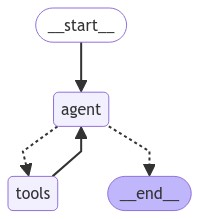

In [14]:
Image(graph_compiled.get_graph().draw_mermaid_png())

In [15]:
output = graph_compiled.invoke({'messages': [
    ('user', 'Write a simple report on how to use AI for productivity.')
]})

output

{'messages': [HumanMessage(content='Write a simple report on how to use AI for productivity.', id='e7c811f9-e806-4f66-a1bc-17c6c3c9a410'),
  AIMessage(content="# Report on Using AI for Productivity\n\n## Introduction\nArtificial Intelligence (AI) has emerged as a transformative tool that can significantly enhance productivity across various sectors. By automating repetitive tasks, providing insights through data analysis, and facilitating better decision-making, AI can help individuals and organizations work more efficiently. This report outlines practical ways to leverage AI for improved productivity.\n\n## 1. Automating Repetitive Tasks\nOne of the most immediate benefits of AI is its ability to automate mundane and repetitive tasks. This can free up valuable time for employees to focus on more strategic activities.\n\n### Examples:\n- **Email Management**: AI-powered tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.\n- **Data Entry**: AI

In [17]:
from IPython.display import Markdown

Markdown(output['messages'][-1].content)

# Report on Using AI for Productivity

## Introduction
Artificial Intelligence (AI) has emerged as a transformative tool that can significantly enhance productivity across various sectors. By automating repetitive tasks, providing insights through data analysis, and facilitating better decision-making, AI can help individuals and organizations work more efficiently. This report outlines practical ways to leverage AI for improved productivity.

## 1. Automating Repetitive Tasks
One of the most immediate benefits of AI is its ability to automate mundane and repetitive tasks. This can free up valuable time for employees to focus on more strategic activities.

### Examples:
- **Email Management**: AI-powered tools can sort, prioritize, and respond to emails, reducing the time spent on inbox management.
- **Data Entry**: AI can automate data entry processes, minimizing human error and speeding up workflows.
- **Scheduling**: AI scheduling assistants can coordinate meetings by finding suitable times for all participants, eliminating back-and-forth communication.

## 2. Enhancing Decision-Making
AI can analyze vast amounts of data quickly and provide actionable insights, enabling better decision-making.

### Examples:
- **Predictive Analytics**: AI can analyze historical data to forecast trends, helping businesses make informed decisions about inventory, marketing strategies, and resource allocation.
- **Business Intelligence Tools**: AI-driven analytics platforms can visualize data and generate reports, making it easier for teams to understand performance metrics and KPIs.

## 3. Improving Communication and Collaboration
AI tools can enhance communication and collaboration within teams, especially in remote work environments.

### Examples:
- **Chatbots**: AI chatbots can provide instant responses to common queries, improving customer service and internal communication.
- **Collaboration Platforms**: AI features in tools like Slack or Microsoft Teams can summarize conversations, highlight important messages, and suggest relevant documents.

## 4. Personalizing Workflows
AI can help tailor workflows to individual preferences and needs, increasing engagement and efficiency.

### Examples:
- **Task Management**: AI can prioritize tasks based on deadlines, importance, and user behavior, helping individuals focus on what matters most.
- **Learning and Development**: AI-driven platforms can recommend training resources based on an employee's skills and career goals, fostering continuous learning.

## 5. Enhancing Creativity
AI can also serve as a creative partner, providing inspiration and generating ideas.

### Examples:
- **Content Creation**: AI tools can assist in writing articles, generating marketing copy, or creating social media posts, allowing teams to produce content more quickly.
- **Design Assistance**: AI design tools can suggest layouts, color schemes, and design elements, streamlining the creative process.

## Conclusion
The integration of AI into daily workflows can lead to significant productivity gains for individuals and organizations. By automating repetitive tasks, enhancing decision-making, improving communication, personalizing workflows, and fostering creativity, AI can help teams work smarter, not harder. As technology continues to evolve, embracing AI will be essential for staying competitive in an increasingly fast-paced world.

## Recommendations
- **Identify Key Areas for Automation**: Assess current workflows to identify tasks that can be automated using AI.
- **Invest in AI Tools**: Explore AI-powered tools that align with your organization’s needs and goals.
- **Train Employees**: Provide training on how to effectively use AI tools to maximize their potential.
- **Monitor and Evaluate**: Continuously assess the impact of AI on productivity and make adjustments as necessary.

By strategically implementing AI, organizations can unlock new levels of productivity and innovation.